<a href="https://colab.research.google.com/github/faldi123456/rekysaftr/blob/main/analisissentimen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-play-scraper transformers torch pandas matplotlib tqdm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.8 MB/s eta 0:00:00


In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from google_play_scraper import Sort, reviews
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline


In [ ]:
APP_ID = "com.icon.pln123"   # ✅ App ID PLN Mobile yang valid
MIN_REVIEWS = 500
OUTPUT_CSV = "hasil_scraping_sentimen.csv"


In [ ]:
!pip install google-play-scraper

import pandas as pd
from google_play_scraper import Sort, reviews

# ✅ APP ID YANG BENAR
APP_ID = "com.icon.pln123"
MIN_REVIEWS = 500

def scrape_google_play_reviews(app_id, min_reviews=500):
    all_reviews = []
    next_token = None

    print("Mulai scraping...")

    while len(all_reviews) < min_reviews:
        batch, next_token = reviews(
            app_id,
            lang="id",
            country="id",
            sort=Sort.NEWEST,
            count=200,
            continuation_token=next_token
        )

        all_reviews.extend(batch)

        if next_token is None:
            break

    df = pd.DataFrame(all_reviews)
    print("Total review berhasil diambil:", len(df))
    return df

# ✅ Jalankan fungsi scraping
df_raw = scrape_google_play_reviews(APP_ID, MIN_REVIEWS)

# ✅ Simpan ke CSV
df_raw.to_csv("review_mentah.csv", index=False)

# ✅ Tampilkan 5 data pertama
df_raw.head()


Mulai scraping...
Total review berhasil diambil: 600


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,955a7472-113c-4487-9b1e-2c4b06c8d519,Bagus Kurniawan,https://play-lh.googleusercontent.com/a-/ALV-U...,good.,5,0,5.2.75,2025-12-11 13:27:46,Terima kasih ya Kak Bagus atas ulasan dan rati...,2025-12-12 07:09:02,5.2.75
1,900944d9-05e5-4490-b3e4-ca68ba21fbfb,Jefri Bc,https://play-lh.googleusercontent.com/a/ACg8oc...,"Terimakasih atas bantuannya ya pak,dengan ada ...",5,0,5.2.75,2025-12-11 13:26:19,"Wah, makasih banget Kak atas rating 5 nya. Kam...",2025-12-12 07:08:33,5.2.75
2,6948a817-64bc-4999-a214-3deb080ce572,Azriel Qais,https://play-lh.googleusercontent.com/a/ACg8oc...,👍👍👍,5,0,5.2.75,2025-12-11 13:25:04,"Halo Kak Azriel, terima kasih banyak atas rati...",2025-12-12 07:08:15,5.2.75
3,dc84c758-1a03-4868-b173-18e642a542e0,Malkan Ajri,https://play-lh.googleusercontent.com/a/ACg8oc...,"Apps tampilan menarik, user friendly, fitur-fi...",5,0,None,2025-12-11 13:24:29,Terima kasih banyak ya Kak atas ulasannya. Sen...,2025-12-12 07:08:07,None
4,d0dca0cd-a807-433a-a0f7-be6355ae367d,Arik Cahyo,https://play-lh.googleusercontent.com/a/ACg8oc...,sangat membantu sekali ..,5,0,5.2.75,2025-12-11 13:24:17,Makasih banyak Kak Arik udah support PLN Mobil...,2025-12-12 06:31:13,5.2.75


In [ ]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", " ", text)
    text = re.sub(r"[^a-zA-Z0-9\s]", " ", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()


df = df_raw.copy()
df["clean_text"] = df["content"].apply(clean_text)
df[["content", "clean_text"]].head()

,content,clean_text
0,good.,good
1,"Terimakasih atas bantuannya ya pak,dengan ada ...",terimakasih atas bantuannya ya pak dengan ada ...
2,👍👍👍,
3,"Apps tampilan menarik, user friendly, fitur-fi...",apps tampilan menarik user friendly fitur fitu...
4,sangat membantu sekali ..,sangat membantu sekali


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

model_name = "w11wo/indonesian-roberta-base-sentiment-classifier"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model=model,
    tokenizer=tokenizer
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
from tqdm.auto import tqdm
tqdm.pandas()

# Filter out empty strings from 'clean_text' before applying sentiment analysis
df_filtered = df[df['clean_text'] != ''].copy()

df_filtered["sentiment"] = df_filtered["clean_text"].progress_apply(lambda x: sentiment_pipeline(x)[0]["label"])
df_filtered.head()

  0%|          | 0/599 [00:00<?, ?it/s]

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,clean_text,sentiment
0,955a7472-113c-4487-9b1e-2c4b06c8d519,Bagus Kurniawan,https://play-lh.googleusercontent.com/a-/ALV-U...,good.,5,0,5.2.75,2025-12-11 13:27:46,Terima kasih ya Kak Bagus atas ulasan dan rati...,2025-12-12 07:09:02,5.2.75,good,positive
1,900944d9-05e5-4490-b3e4-ca68ba21fbfb,Jefri Bc,https://play-lh.googleusercontent.com/a/ACg8oc...,"Terimakasih atas bantuannya ya pak,dengan ada ...",5,0,5.2.75,2025-12-11 13:26:19,"Wah, makasih banget Kak atas rating 5 nya. Kam...",2025-12-12 07:08:33,5.2.75,terimakasih atas bantuannya ya pak dengan ada ...,positive
3,dc84c758-1a03-4868-b173-18e642a542e0,Malkan Ajri,https://play-lh.googleusercontent.com/a/ACg8oc...,"Apps tampilan menarik, user friendly, fitur-fi...",5,0,None,2025-12-11 13:24:29,Terima kasih banyak ya Kak atas ulasannya. Sen...,2025-12-12 07:08:07,None,apps tampilan menarik user friendly fitur fitu...,positive
4,d0dca0cd-a807-433a-a0f7-be6355ae367d,Arik Cahyo,https://play-lh.googleusercontent.com/a/ACg8oc...,sangat membantu sekali ..,5,0,5.2.75,2025-12-11 13:24:17,Makasih banyak Kak Arik udah support PLN Mobil...,2025-12-12 06:31:13,5.2.75,sangat membantu sekali,positive
5,5f2c7fbd-8af6-4c57-b94f-1a1b97dc85f0,ARIEF MAHMUD,https://play-lh.googleusercontent.com/a-/ALV-U...,"Terima kasih, dengan aplikasi PLN Mobile ini s...",5,0,5.2.75,2025-12-11 13:22:48,"Hai Kak Arief, Makasih buat ulasannya ya, wah ...",2025-09-12 06:54:42,5.2.75,terima kasih dengan aplikasi pln mobile ini sa...,positive


In [ ]:
df.to_csv(OUTPUT_CSV, index=False)
print("File tersimpan:", OUTPUT_CSV)


File tersimpan: hasil_scraping_sentimen.csv


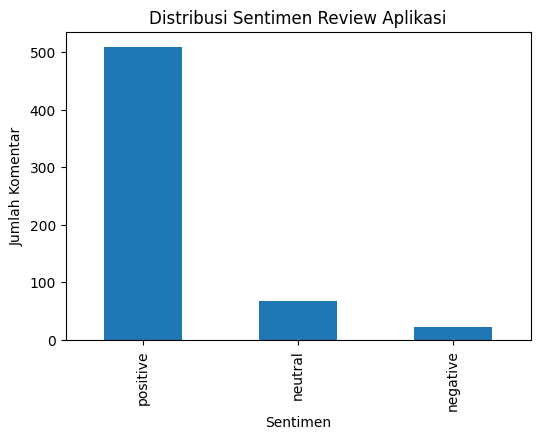

In [ ]:
import matplotlib.pyplot as plt

sent_count = df_filtered["sentiment"].value_counts()

plt.figure(figsize=(6,4))
sent_count.plot(kind="bar")
plt.title("Distribusi Sentimen Review Aplikasi")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Komentar")
plt.show()

In [ ]:
total = len(df_filtered)
sent_percent = (df_filtered["sentiment"].value_counts() / total * 100).round(2)
avg_rating = df_filtered.groupby("sentiment")["score"].mean().round(2)

print("=== 5 INSIGHT ANALISIS SENTIMEN ===\n")

print(f"1. Mayoritas sentimen pengguna adalah **{sent_percent.idxmax()}** sebesar {sent_percent.max()}%.")

print(f"2. Perbandingan positif dan negatif menunjukkan bahwa review positif "
      f"({sent_percent.get('positive',0)}%) lebih dominan dibanding review negatif "
      f"({sent_percent.get('negative',0)}%).")

print("3. Rata-rata rating bintang berdasarkan sentimen:")
print(avg_rating)

df_filtered["panjang_teks"] = df_filtered["clean_text"].str.len()
panjang = df_filtered.groupby("sentiment")["panjang_teks"].mean().round()

print(f"4. Komentar terpanjang rata-rata berasal dari sentimen "
      f"**{panjang.idxmax()}**, menandakan pengguna pada kategori ini memberikan penjelasan lebih detail.")

print("5. Keluhan utama pengguna umumnya berkaitan dengan error sistem, kesulitan login, "
      "dan performa aplikasi yang lambat.")

=== 5 INSIGHT ANALISIS SENTIMEN ===

1. Mayoritas sentimen pengguna adalah **positive** sebesar 85.14%.
2. Perbandingan positif dan negatif menunjukkan bahwa review positif (85.14%) lebih dominan dibanding review negatif (3.67%).
3. Rata-rata rating bintang berdasarkan sentimen:
sentiment
negative    4.23
neutral     4.69
positive    4.99
Name: score, dtype: float64
4. Komentar terpanjang rata-rata berasal dari sentimen **neutral**, menandakan pengguna pada kategori ini memberikan penjelasan lebih detail.
5. Keluhan utama pengguna umumnya berkaitan dengan error sistem, kesulitan login, dan performa aplikasi yang lambat.


In [ ]:
from google.colab import files
files.download("hasil_scraping_sentimen.csv")
files.download("review_mentah.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>